epoch=0, loss=1.77321
epoch=100, loss=0.23570
epoch=200, loss=0.13716
epoch=300, loss=0.11202
epoch=400, loss=0.09598
epoch=500, loss=0.08452
epoch=600, loss=0.07577
epoch=700, loss=0.06880
epoch=800, loss=0.06309
epoch=900, loss=0.05829


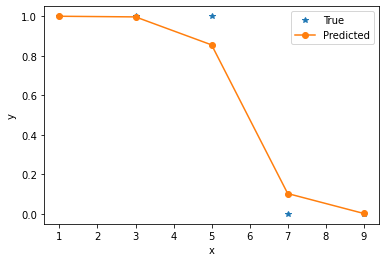

8.0시간 수면 후 피곤할 확률은 1.6%이다
따라서 피곤하지 않다.


In [ ]:
import torch
import matplotlib.pyplot as plt

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.linear = torch.nn.Linear(1, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        z = self.linear(x)
        y_hat = self.sigmoid(z)
        return y_hat

x_lst = torch.Tensor([1, 3, 5, 7, 9]).view(-1, 1)
y_lst = torch.Tensor([1, 1, 1, 0, 0]).view(-1, 1)

net = Net()
bce = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

for epoch in range(1000):
    y_hat = net(x_lst)
    loss = bce(y_hat, y_lst)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={loss.item():0.5f}')

plt.plot(x_lst, y_lst,'*')
plt.plot(x_lst, net(x_lst).detach().numpy(),'-o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('True','Predicted'))
plt.show()

x_test = torch.Tensor([[8]])
y_test = net(x_test)

is_tired = '하다' if y_test.item() >= 0.5 else '하지 않다'

print(f'{x_test.item()}시간 수면 후 \
피곤할 확률은 {y_test.item()*100:0.1f}%이다')

print(f'따라서 피곤{is_tired}.')

In [ ]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-1.9691]], requires_grad=True)
Parameter containing:
tensor([11.6203], requires_grad=True)
